# 4장. 데이터 표현과 특성 공학

*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/04-representing-data-feature-engineering.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/04-representing-data-feature-engineering.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

<b><font size=2>이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 컴퓨터에 나눔 폰트가 없다면 설치해 주세요.<br><br><font color='red'>주의: 코랩에서 실행하는 경우 아래 셀을 실행하고 ⌘+M . 또는 Ctrl+M . 을 눌러 런타임을 재시작한 다음 처음부터 다시 실행해 주세요.</font></b>

In [1]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [2]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='AppleGothic') #NanumBarunGothic
matplotlib.rcParams['axes.unicode_minus'] = False

## 4.1 범주형 변수

### 4.1.1 원-핫-인코딩 (가변수)
  * 특성 공학 : 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것
  * n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현
  * 가변수라고도 한다.
  * 가변수는 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것

In [3]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'gender',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
            'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### 문자열로 된 범주형 데이터 확인하기

In [4]:
print(data.gender.value_counts()) # 남성, 여성 2분류로 나누어져 원핫인코딩을 사용하기 좋은 특성을 가졌다.

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("원본 특성:\n", list(data.columns), "\n")
# pd.get_dummies()는 객체 타입이나 범주형을 가진 열을 자동으로 반환
data_dummies = pd.get_dummies(data)
print("get_dummies 후 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ O

In [6]:
data_dummies.shape

(32561, 46)

In [7]:
# 모델 학습을 위해 데이터에서 target 값(income)을 분리
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values # 수입
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
print(f"테스트 점수: {logreg.score(X_test, y_test):.2f}")

테스트 점수: 0.81


### 4.1.2 숫자로 표현된 범주형 특성

In [9]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [10]:
# get_dummies를 사용하면 문자열 특성만 인코딩 되며 숫자 특성은 변화되지 않는다.
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [11]:
# 숫자 특성도 가변수화 하고 싶다면 문자형으로 형변환 후  컬럼 매개변수에 인코딩 하고 싶은 열을 명시한다.(매개변수를 안주면 문자열 전체 대상인듯)
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

In [12]:
# OneHotEncoder는 모든 열에 인코딩을 수행한다(문자열, 정수 모두 포함)
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [13]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
# 변환된 특성에 해당하는 원본 범주형 변수 이름 가져오기 
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


In [14]:
print(data.shape)
data.head()

(32561, 7)


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# ColumnTransformer를 이용해 연속형 변수와 범주형 변수를 동시에 Scaling
# Tuple 입력
ct = ColumnTransformer(
    [("standardsc", StandardScaler(), ['age', 'hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), 
    ['workclass', 'education', 'gender', 'occupation'])])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다
data_features = data.drop("income", axis=1)
# 데이터프레임과 incom을 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train) # fit 후 transform까지 해줘야 함
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape) 
print(X_train_trans[:2]) # 실제 encoding 결과 2개

(24420, 44)
[[ 1.499 -0.445  0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     1.   ]
 [ 2.38  -1.668  0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     1.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.   ]]


In [17]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print(f"테스트 점수: {logreg.score(X_test_trans, y_test):.2f}")

테스트 점수: 0.81


In [18]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

## 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

In [19]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

## 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

(1000,)
(1000, 1)
(120,)


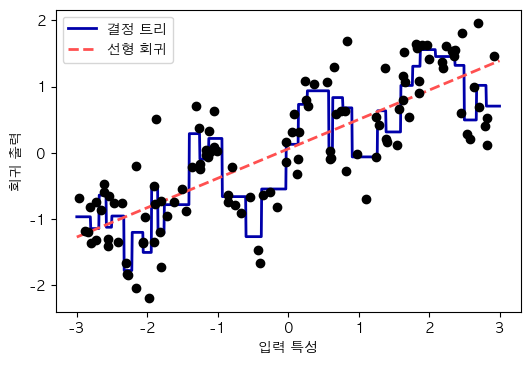

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print(np.linspace(-3, 3, 1000, endpoint=False).shape)
print(line.shape)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
print(X[:,0].shape)
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

* 연속형 데이터에 강력한 선형 모델을 만드는 방법은 한 특성을 여러 특성으로 나누는 구간 분할이다.(이산화)

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform') # 10개 구간으로 일정하게 나누겠다.
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
         1.744,  2.333,  2.921])                                       ]


In [23]:
# transform 메서드를 사용하면 각 데이터 포인트를 해당 구간으로 인코딩
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [24]:
# 10개 구간 중 속하는 구간이 1 아닌 구간이 0
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [25]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

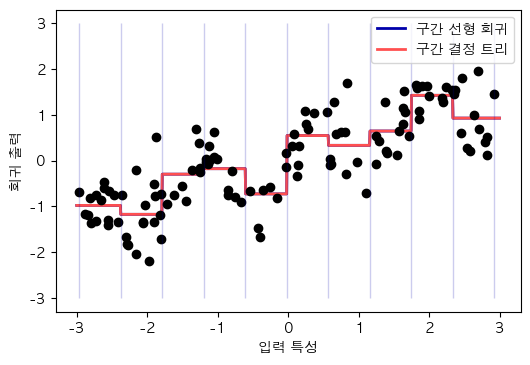

In [26]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.show() # 책에는 없음

## 4.5 상호작용과 다항식
**Wave 데이터셋을 이용한 모델 비교**
* 절편 및 기울기를 학습한 선형회귀 모델 구성

In [27]:
# 배열을 수평으로 순서대로 쌓습니다.(스택합니다.)
# 기울기 추가하는 방법 : 구간 분할된 데이터에 원래 특성을 다시 추가
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


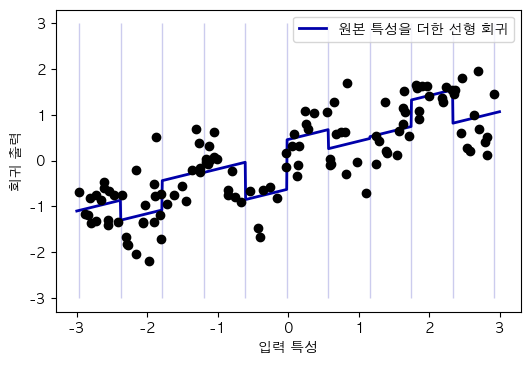

In [28]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show() # 책에는 없음

**위 모델은 각 구간의 절편과 기울기를 학습**
* 기울기가 모든 구간에서 같으니 유익해 보이지 않음
* 각 구간에서 다른 기울기를 가지는게 좋다.
* 이런 효과를 위해 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가
* 구간 특성과 원본 특성의 곱

**Wave 데이터셋을 이용한 모델 비교**
* 각 구간 다른 절편, 기울기를 학습한 선형회귀 모델 구성

In [29]:
# 데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가진다.
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


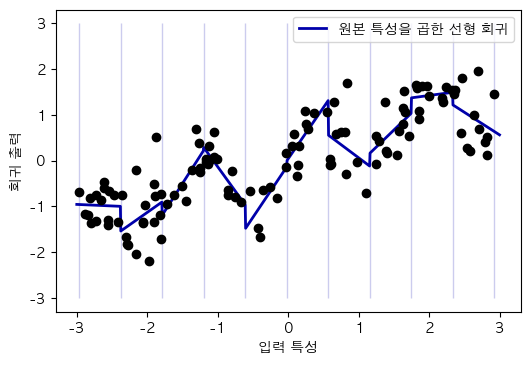

In [30]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

#### 구간별 기울기가 다른 선형 회귀
*  각 구간에서 절편과 기울기가 모두 다름
* 구간 나누기는 연속형 특성을 확장하는 방법중 하나

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
# X_poly의 첫번째 열은 X와 같고 다른 열은 첫번째 열의 거듭제곱 (차원 생성원리는 거듭제곱)
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [32]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [33]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly 원소:
 [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


### 다항식 특성 영향
#### Wave 데이터셋을 이용한 모델 비교
* 10차 다항식을 이용한 회귀 모델 구성
* 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만듬
* 고차원 다항식은 데이터가 부족한 영역에서 민감하게 동작

In [34]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


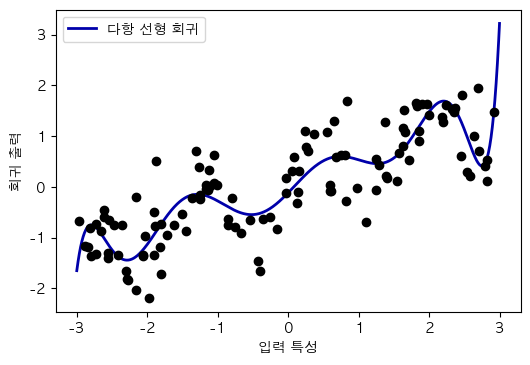

In [35]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

### 다항식 특성 영향
#### Wave 데이터셋을 이용한 모델 비교
* RBF 커널 SVM의 gamma 매개변수 변화에 따른 비교
* 더 복잡한 모델인 터널 SVM을 사용해 특성 데이터를 변환하지 않고 
* 다항 회귀와 비슷한 복잡도를 가진 예측을 만듬

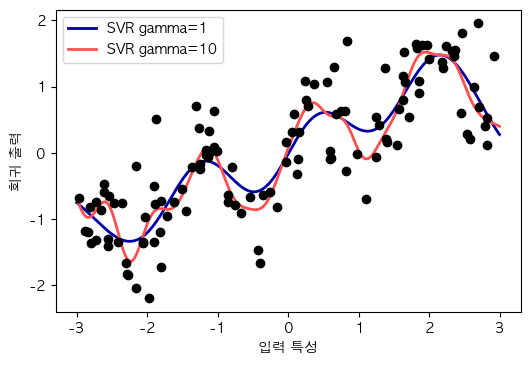

In [36]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

In [37]:
# 보스턴 주택 데이터셋이 1.0 버전에 deprecated 되었고 1.2 버전에서 삭제됩니다.
# 경고 메시지를 피하기 위해 다음 코드를 추가합니다.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [39]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("다항 특성 이름:\n", poly.get_feature_names_out())

다항 특성 이름:
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


$$ X\_train\_poly = 1 + 13 + 13 + {{13 * 12} \over {2}} = 105 $$
$$ 1 : 절편 $$
$$ 13 : degree = 1 (기존의 X) $$
$$ 13 : degree = 2 (X * X)$$
$$ 78 : 두개의\ 특성을\ 조합하는\ 모든\ 방법 $$

#### 다항식 특성 확장
* 원래 특성 13개가 특성 조합으로 특성 곱 및 다항식 특성 추가하여 105 개로 확장
* degree=2로하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻음

#### **상호작용 특성 있는 데이터와 없는 데이터에 대한 릿지회귀 결과**
* 선형 모델은 영향을 받지만 랜덤 포레스트처럼 복잡한 모델은 차이없음

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


#### 특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹음.

#### 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어든다.

* 제곱항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨

## 4.6 일변량 비선형 변환
**실제 데이터 속성과 비슷한 랜덤 카운트 데이터 생성**
* 특성 값 데이터는 모두 정수이며 3개 특성은 실수

In [42]:
rnd = np.random.RandomState(0) # 랜덤 상태값
# np.random.RandomState.normal : 정규(가우스) 분포에서 랜덤 표본을 추출
X_org = rnd.normal(size=(1000, 3)) 
w = rnd.normal(size=3)

# np.ramdom.RandomState.poisson : 포아송 분포에서 표본을 추출
# np.exp : 입력 배열에 있는 모든 요소의 지수를 계산합니다.
X = rnd.poisson(10 * np.exp(X_org)) 
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [43]:
# 0-28번, 1-38번, 2-68번 출현
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


#### 카운트 데이터를 사용한 일변량 비선형 변환
#### 트리 기반 모델은 특성의 순서에만 영향을 받지만, 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관
* 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어려움
* 대부분  모델은 각 특성이 **정규분포**와 비슷할 때 최고의 성능을 나타냄
* 정수 카운트 데이터의 히스토그램

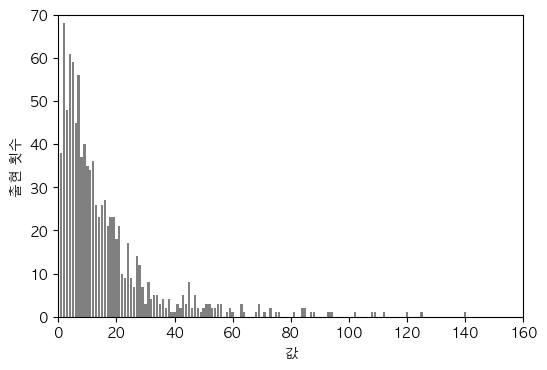

In [44]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show() # 책에는 없음

#### 선형 릿지회귀 적용
* 비교적 낮은 R2 점수 나옴 - Ridge는 제대로 모델링하지 못함

In [45]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


#### 로그 스케일로 데이터 변환
* 0인 데이터를 위해 log(X) 대신 log(X+1) 사용

In [46]:
# np.log : 요소별 자연로그
X_train_log = np.log(X_train + 1) # x가 0일 떄 - 무한대로 가는 것을 막기 위해
X_test_log = np.log(X_test + 1)

In [47]:
print(X_train_log)
print(X_train_log.shape)

[[1.792 0.693 2.565]
 [0.693 2.773 1.792]
 [2.833 1.792 1.386]
 ...
 [3.638 2.079 2.89 ]
 [2.079 4.454 2.485]
 [1.099 3.045 2.398]]
(750, 3)


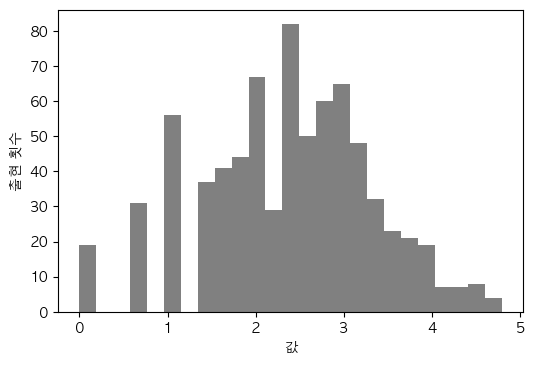

In [48]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show() # 책에는 없음

**선형 릿지 회귀 적용**
* 이번에는 훨씬 좋은 결과가 나옴

In [49]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(f"테스트 점수: {score:.3f}")

테스트 점수: 0.875


#### 데이터 변환은 선형 모델에서는 필수지만 트리 모델에서는 불필요함
* 트리기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아됨

#### 구간분할, 다항식, 상호작용 등 데이터 변환의 모델 성능 영향 정도
* 선형모델/나이브베이즈 > SVM, 최근접이웃, 신경망 > 트리기반 모델

## 4.7 특성 자동 선택
### 4.7.1 일변량 통계
**유방암 데이터셋에 분류 특성 선택 적용**
* 의미 없는 노이즈 특성을 데이터에 추가

#### 사이킷런에서 일변량 분석으로 특성을 선택하려면 
* 분류에서는 f_classif, 회귀 r_regression을 선택
* 임계값을 계산하는 방법 
    SelectKBest:고정된 K개의 특성을 선택,SelectPercentile:지정된 비율만큼 특성을 선택

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다(데이터에 노이즈 추가)
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
# 특성의 50%만 사용
select = SelectPercentile(score_func=f_classif, percentile=50) 
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


* 원래 유방암 데이터의 feature 30개 + 노이즈 50개
* 80개의 feature 중 50%인 40개만 사용(노이즈가 섞인)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


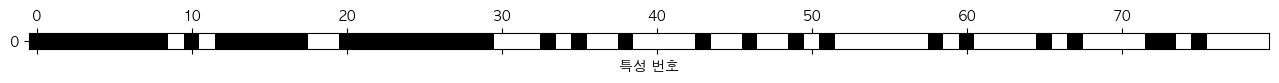

In [51]:
# get_support() 메소드는 선택된 특성을 T/F로 표시
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

* 선택 특성은 대부분 원본 특성이며 노이즈 특성이 거의 제거됨

### 유방암 데이터셋에 분류 특성 선택 적용
#### 전체 특성 이용 경우와 선택 특성 이용 경우의 로지스틱 회귀 성능 비교
* 노이즈 특성을 제거했을 때 성능이우수

In [52]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print(f"전체 특성을 사용한 점수: {lr.score(X_test, y_test):.3f}")
lr.fit(X_train_selected, y_train)
print(f"선택된 일부 특성을 사용한 점수: {lr.score(X_test_selected, y_test):.3f}")
# scikit-learn 버전에 따라 결과는 다를 수 있음

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.933


### 4.7.2 모델 기반 특성 선택

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median") # threshold=median : 중간 값보다 큰

* 일변량 분석 특성 선택과 비교 위해 중간값을 임계치로 선택
* 트리 100개로 만든 랜덤 포레스트 분류기로 특성 중요도 계산

In [56]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


**선택 특성 시각화**
* 2개를 제외한 모든 원본 특성 선택

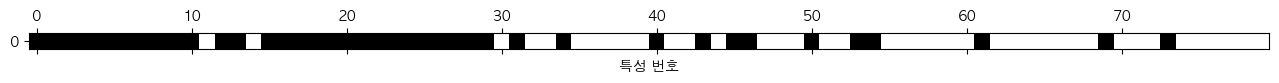

In [57]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

**일변량 통계 방식에 비해 성능이 향상되었음**

In [58]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947


### 4.7.3 반복적 특성 선택
### 유방암 데이터셋에 대한 RFE(Recursive Feature Elimination) 적용
#### 랜덤포레스트 분류 모델 사용
* 1개를 제외한 모든 원본 특성 선택
* 모든 특성으로 시작해서 모델을 만들고 중요도가 가장 낮은 특성을 제거

(80,)


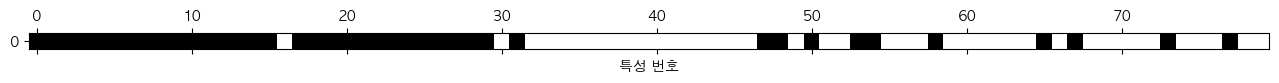

In [63]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)


select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
print(select.get_support().shape)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

#### 유방암 데이터셋에 대한 RFE 적용
* 로지스틱회귀의 정확도 확인

In [61]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f"테스트 점수: {score:.3f}")

테스트 점수: 0.940


In [58]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


## 4.8 전문가 지식 활용

In [64]:
citibike = mglearn.datasets.load_citibike()

In [65]:
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


In [76]:
print(type(citibike))

<class 'pandas.core.series.Series'>


['토 08-01', '일 08-02', '월 08-03', '화 08-04', '수 08-05', '목 08-06', '금 08-07', '토 08-08', '일 08-09', '월 08-10', '화 08-11', '수 08-12', '목 08-13', '금 08-14', '토 08-15', '일 08-16', '월 08-17', '화 08-18', '수 08-19', '목 08-20', '금 08-21', '토 08-22', '일 08-23', '월 08-24', '화 08-25', '수 08-26', '목 08-27', '금 08-28', '토 08-29', '일 08-30', '월 08-31']


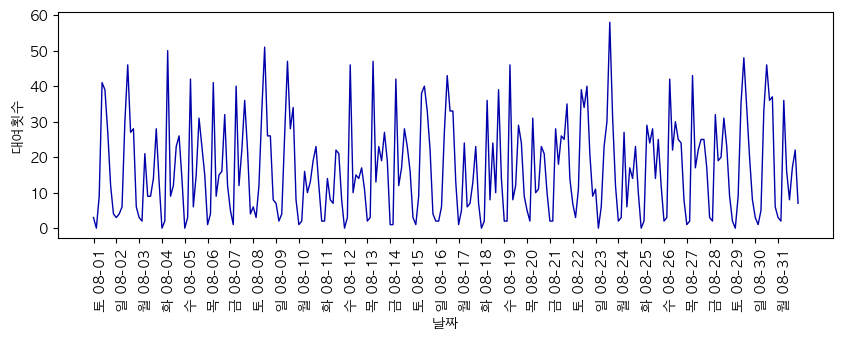

In [77]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
# %w : 일자
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
print(xticks_name)
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")
plt.show() # 책에는 없음

In [81]:
# 타깃값 추출 (대여 횟수)
y = citibike.values 
# 판다스 1.3.0에서 datetime을 astype()으로 정수로 바꾸는 것이 deprecated되었고 향후 삭제될 예정입니다.
# 대신 view()를 사용합니다.
# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.view("int64").reshape(-1, 1) // 10**9

#### 입력 특성은 대여가 일어난 날짜와 시간
* POSIX 시간 : 1970년 1월 1일 00:00:00 협정 세계시(UTC) 부터의 경과 시간을 초로 환산하여 정수로 나타낸 것
* 날짜를 기준으로 훈련 데이터와 테스트 데이터로 나누고 결과 그래프로 그리는 함수 작성

In [82]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train) # 회귀 모델
    print(f"테스트 세트 R^2: {regressor.score(X_test, y_test):.2f}")
    y_pred = regressor.predict(X_test) # Validation set 점수
    y_pred_train = regressor.predict(X_train) # train set 점수
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    # plot 작성 시 label을 주면 legend에 반영된다.
    plt.plot(range(n_train), y_train, label="훈련") # train set 그래프
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트") # test set 예측
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측") # train set 예측 

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


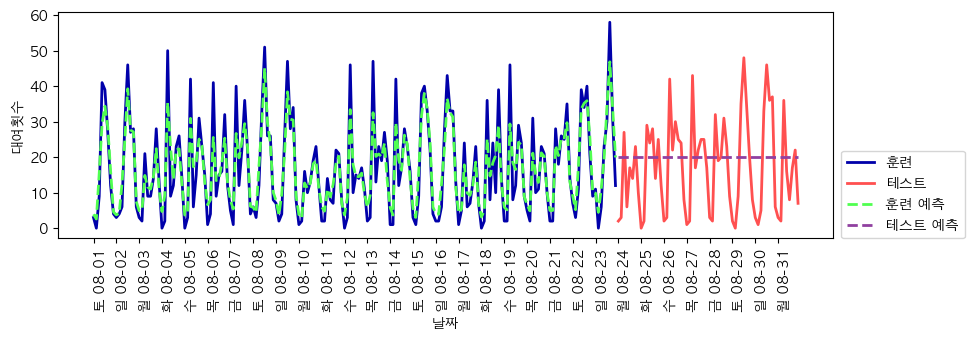

In [83]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

#### 입력 특성(POSIX 시간) 범위 밖의 테스트 데이터에 대해 학습 불가능
* train set에 대해서는 잘 예측하지만 실제 test set은 예측 성능이 나오지 않는다.

테스트 세트 R^2: 0.60
[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]]


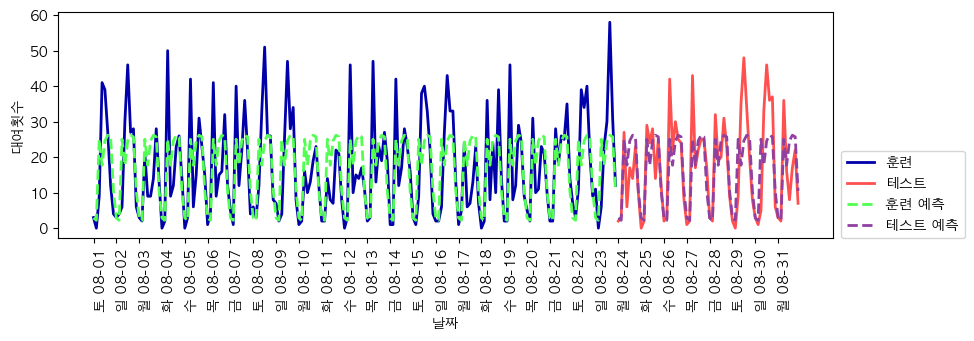

In [92]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)
print(X_hour[:10]) # POSIX 시간 

테스트 세트 R^2: 0.84
[[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]]


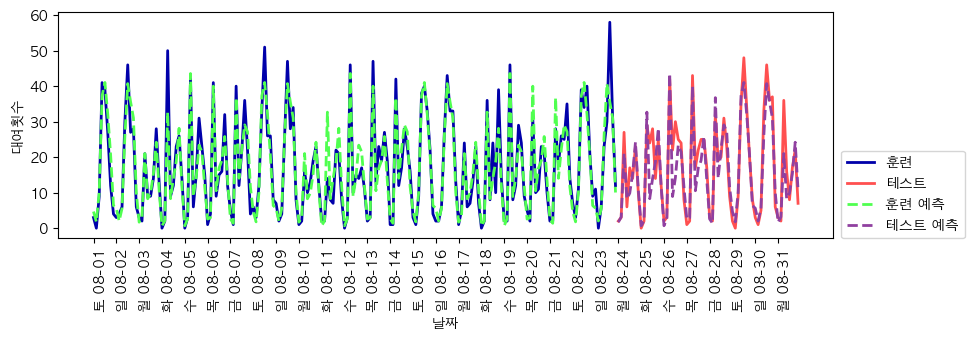

In [93]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), \
                citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)
print(X_hour_week[:5])

* 위의 모델은 하루의 시간과 요일에 따른 주기적인 패턴을 따름
* R^2은 0.84로 좋은 성능을 냄
* 모델이 학습한 것은 8월 23일까지 요일별, 시간별 평균 대여 횟수

테스트 세트 R^2: 0.13


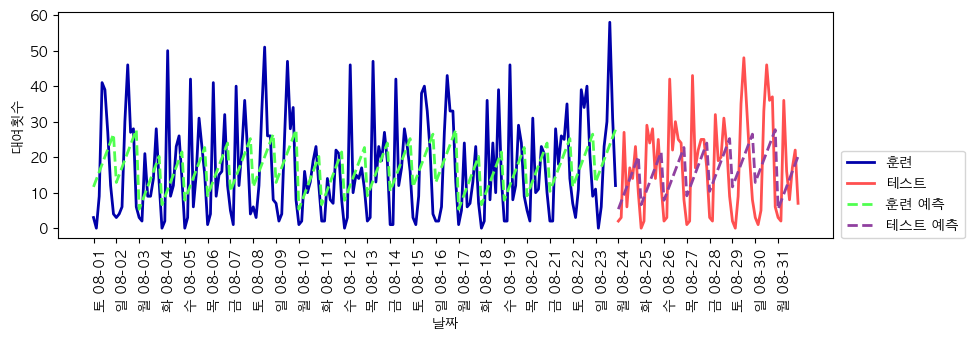

In [94]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

scikit-learn 0.22 버전에서 OneHotEncoder 클래스가 정수 카테고리를 인식하는 방식이 변경됩니다. 이전에는 훈련 데이터에 나타난 0~최댓값 사이 범위를 카테고리로 인식하여 원-핫 인코딩하지만 0.22 버전부터는 고유한 정수 값을 카테고리로 사용합니다. 0.20 버전부터 정수형 데이터를 변환할 때 이와 관련된 경고가 출력됩니다.

In [95]:
# 시간을 범주형 변수로 바꿔(OneHotEncoder) 선형회귀 모델에 적용
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


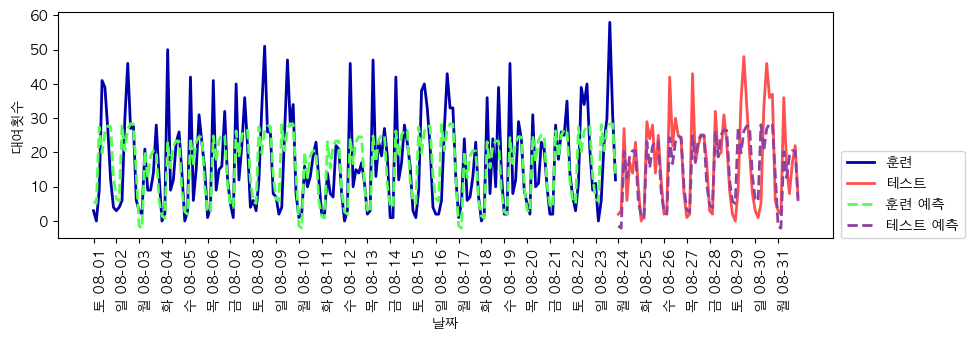

In [96]:
eval_on_features(X_hour_week_onehot, y, Ridge())

#### 시간/요일 조합한 상호작용 특성을 사용해 선형회귀 모델 적용

테스트 세트 R^2: 0.85


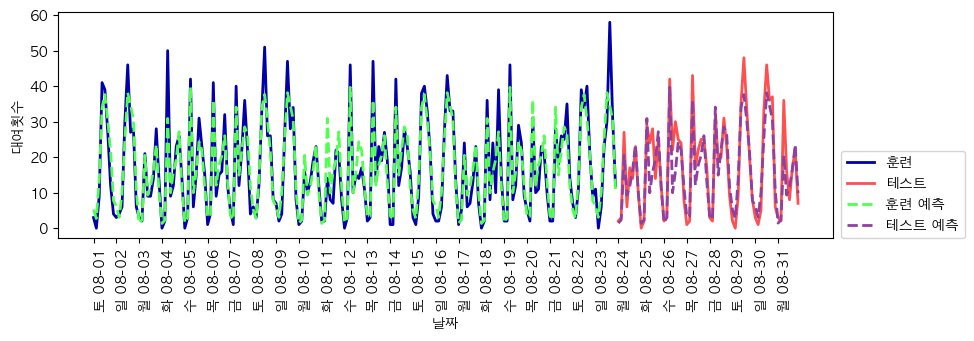

In [97]:
# Generate polynomial and interaction features.
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [71]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [72]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

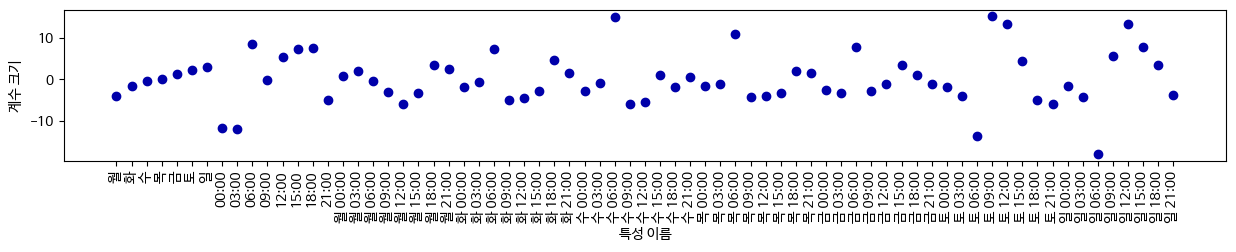

In [73]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")
plt.show() # 책에는 없음